In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import yaml
import sys
import torch
import scipy.stats as stats
import math

ROOT = "../"
sys.path.insert(0,ROOT + "src/")
sys.path.insert(0,ROOT + "engine/")

from run_experiment import get_data

In [2]:
def load_experiment(exp_id,run):
    # get path
    path = ROOT + "mlruns/{}/{}/artifacts/".format(exp_id,run)
    # load model
    model = pd.read_pickle(path + "model.p")
    # load args
    args_filename = [v for v in os.listdir(path + "reproduce/engine/") if ".yml" in v][0]
    args_path = path + "reproduce/engine/" + args_filename
    with open(args_path,"r") as f:
        args = yaml.safe_load(f)
    return model,args

In [3]:
# set experiment
exp_id = "1"
run = "2b88bc5649474f6cba93fb19240b7a77"

# load model
model,args = load_experiment(exp_id,run)
# get predictions
X,y = get_data(args)
output = model.predict_parameters(X)

In [47]:
 def show_normal(mu,sigma,perc = .75,y_unit = 1000):
    # set x and y
    mu = mu_all[idx]
    sigma = sigma_all[idx]
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma)

    perc = .75
    start,end = stats.norm.interval(perc,mu,sigma)
    x_int = np.linspace(start,end, 100)
    y_int = stats.norm.pdf(x_int, mu, sigma)
    ticks = [start,mu,end]

    # plot
    with plt.style.context('dark_background'):
        plt.figure(figsize = (12,6))
        plt.fill_between(x,y, color = "C0", alpha = .5)
        plt.fill_between(x_int,y_int, label = "75%", color = "C0", alpha=.8)
        density_mu = stats.norm.pdf(mu, mu, sigma)
        plt.text(mu,density_mu * .3,
                 "  {}%".format(int(100*perc)),
                 size = 40,
                 horizontalalignment='center',
                 color = "gray")
        plt.text(mu,density_mu*1.08,
                 "{:,}€".format(int((mu * y_unit))).replace(",","."),
                 size = 70,
                 horizontalalignment='center',
                 color = "C3")
        plt.xticks(ticks,["{:,}€".format(int((v * y_unit))).replace(",",".") for v in ticks],size=25)
        plt.yticks([])
        plt.ylim(0,density_mu*1.4)
        plt.xlim(mu - 3*sigma, mu + 3*sigma)
        plt.title("Salario netto annuale [stima]",size = 30)
        plt.show()

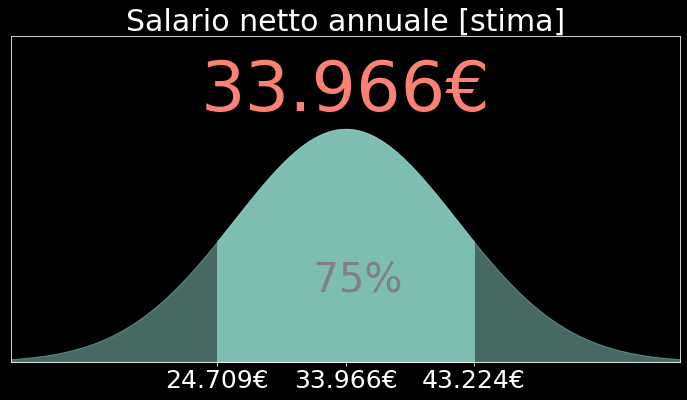

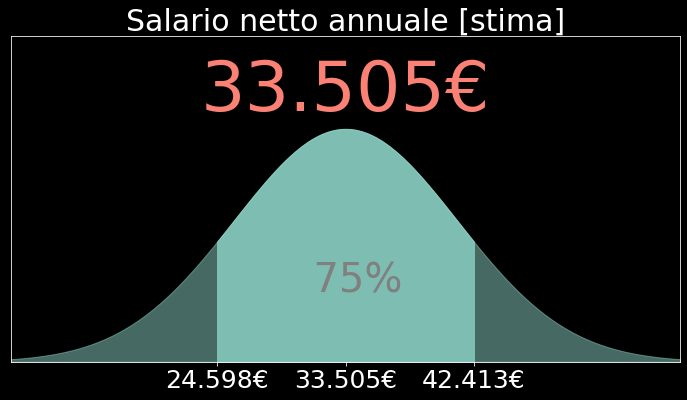

In [58]:
mu_all,sigma_all = output

for idx in X.index:
    mu = mu_all[idx]
    sigma = sigma_all[idx]
    
    if mu > 33:
        show_normal(mu,sigma,.75, model.y_unit)

In [60]:
np.max(y)

36500.0